In [ ]:
import numpy as np
import os
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### 데이터 로드

In [ ]:
import numpy as np

# 1. 데이터 로드
normal_arr = np.load("/content/drive/MyDrive/list/train_normal_arr.npy")
caution_arr = np.load("/content/drive/MyDrive/list/train_caution_arr.npy")
defect_arr = np.load("/content/drive/MyDrive/list/train_defect_arr.npy")

# 데이터 로드 성공 메시지 및 shape 확인
print("✅ 데이터 로드 성공!")
print(f"📂 normal_arr shape: {normal_arr.shape}")
print(f"📂 caution_arr shape: {caution_arr.shape}")
print(f"📂 defect_arr shape: {defect_arr.shape}")


✅ 데이터 로드 성공!
📂 normal_arr shape: (770977, 98)
📂 caution_arr shape: (584051, 98)
📂 defect_arr shape: (584498, 98)


### 👽 슬라이딩 윈도우 처리한 것 새로운 데이터 형성

In [ ]:
import os
# ✅ 2. 슬라이딩 윈도우 함수 정의
def create_sliding_windows(arr, window_size=100, step=30):
    """ 시계열 데이터를 윈도우 크기로 슬라이싱하는 함수 """
    n_rows = arr.shape[0]  # 총 데이터 개수
    windows = []  # 결과 저장 리스트
    for i in range(0, n_rows - window_size + 1, step):  # step 만큼 이동하며 윈도우 생성
        windows.append(arr[i:i+window_size])
    return np.array(windows)  # 리스트를 numpy 배열로 변환

# ✅ 3. 각 데이터에 대해 슬라이딩 윈도우 적용 (새로운 데이터)
normal_windows = create_sliding_windows(normal_arr, window_size=100, step=30)
caution_windows = create_sliding_windows(caution_arr, window_size=100, step=30)
defect_windows = create_sliding_windows(defect_arr, window_size=100, step=30)

print("\n✅ 슬라이딩 윈도우 적용 완료!")
print(f"📂 normal_windows shape: {normal_windows.shape}")
print(f"📂 caution_windows shape: {caution_windows.shape}")
print(f"📂 defect_windows shape: {defect_windows.shape}")

# ✅ 4. 슬라이딩 윈도우 데이터를 새로운 .npy 파일로 저장
save_dir = "/content/drive/MyDrive/list/sliding_window_data"  # 저장할 폴더 경로
os.makedirs(save_dir, exist_ok=True)  # 폴더 없으면 생성

np.save(os.path.join(save_dir, "train_normal_windows.npy"), normal_windows)
np.save(os.path.join(save_dir, "train_caution_windows.npy"), caution_windows)
np.save(os.path.join(save_dir, "train_defect_windows.npy"), defect_windows)

print("\n✅ 새로운 슬라이딩 윈도우 데이터 저장 완료!")
print(f"📂 저장 경로: {save_dir}")



✅ 슬라이딩 윈도우 적용 완료!
📂 normal_windows shape: (25696, 100, 98)
📂 caution_windows shape: (19466, 100, 98)
📂 defect_windows shape: (19480, 100, 98)

✅ 새로운 슬라이딩 윈도우 데이터 저장 완료!
📂 저장 경로: /content/drive/MyDrive/list/sliding_window_data


## XGBoost -> 2D만 적용 가능! + 마지막에 시각화


🚀 XGBoost 모델 학습 시작...
[0]	Test-mlogloss:1.00569
[1]	Test-mlogloss:0.92450
[2]	Test-mlogloss:0.85359
[3]	Test-mlogloss:0.79139
[4]	Test-mlogloss:0.73615
[5]	Test-mlogloss:0.68636
[6]	Test-mlogloss:0.64316
[7]	Test-mlogloss:0.60277
[8]	Test-mlogloss:0.56462
[9]	Test-mlogloss:0.53262
[10]	Test-mlogloss:0.50085
[11]	Test-mlogloss:0.47384
[12]	Test-mlogloss:0.44964
[13]	Test-mlogloss:0.42551
[14]	Test-mlogloss:0.40095
[15]	Test-mlogloss:0.38291
[16]	Test-mlogloss:0.36239
[17]	Test-mlogloss:0.34429
[18]	Test-mlogloss:0.32919
[19]	Test-mlogloss:0.31435
[20]	Test-mlogloss:0.30039
[21]	Test-mlogloss:0.28733
[22]	Test-mlogloss:0.27511
[23]	Test-mlogloss:0.26392
[24]	Test-mlogloss:0.25378
[25]	Test-mlogloss:0.24352
[26]	Test-mlogloss:0.23424
[27]	Test-mlogloss:0.22533
[28]	Test-mlogloss:0.21739
[29]	Test-mlogloss:0.20969
[30]	Test-mlogloss:0.20226
[31]	Test-mlogloss:0.19536
[32]	Test-mlogloss:0.18842
[33]	Test-mlogloss:0.18171
[34]	Test-mlogloss:0.17598
[35]	Test-mlogloss:0.17107
[36]	Test-mlogl

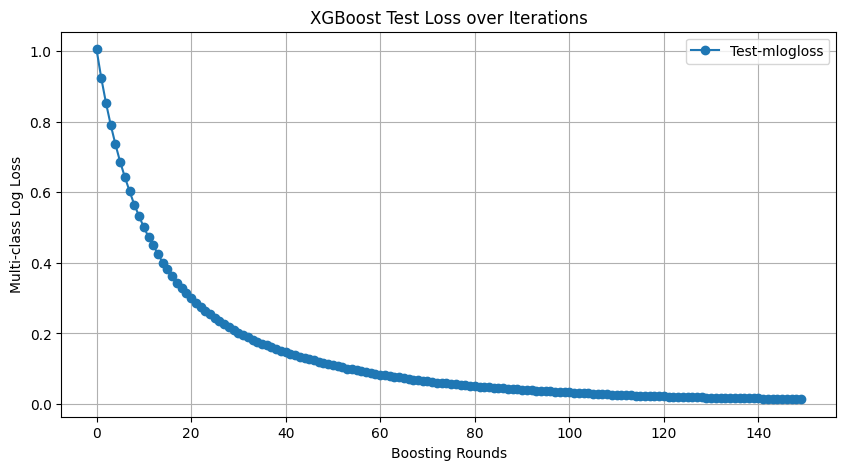

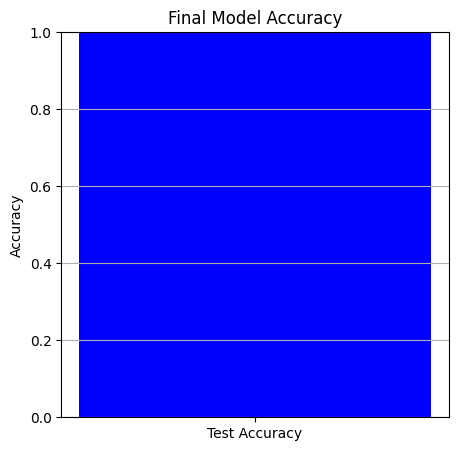

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ✅ 1. 슬라이딩 윈도우 데이터 불러오기
normal_windows = np.load("/content/drive/MyDrive/list/sliding_window_data/train_normal_windows.npy")
caution_windows = np.load("/content/drive/MyDrive/list/sliding_window_data/train_caution_windows.npy")
defect_windows = np.load("/content/drive/MyDrive/list/sliding_window_data/train_defect_windows.npy")

# ✅ 2. 각 데이터에 대한 라벨 생성
normal_labels = np.zeros(len(normal_windows))   # 정상 (0)
caution_labels = np.ones(len(caution_windows))  # 주의 (1)
defect_labels = np.full(len(defect_windows), 2) # 결함 (2)

# ✅ 3. 데이터를 합쳐서 최종 X, y 생성
X = np.concatenate([normal_windows, caution_windows, defect_windows], axis=0)
y = np.concatenate([normal_labels, caution_labels, defect_labels], axis=0)

# ✅ 4. 3D 데이터를 2D로 변환 (XGBoost 입력 형식 맞추기)
X = X.reshape(X.shape[0], -1)

# ✅ 5. Train-Test Split (학습 데이터 & 테스트 데이터 분할)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 6. XGBoost 하이퍼파라미터 설정
params = {
    "objective": "multi:softmax",  # 다중 클래스 분류 (0, 1, 2)
    "num_class": 3,  # 클래스 개수
    "eval_metric": "mlogloss",  # 다중 클래스 로그 손실
    "max_depth": 10,  # 트리 깊이
    "eta": 0.1,  # 학습률
    "subsample": 1.0,  # 샘플링 비율
    "colsample_bytree": 1.0,  # 트리 생성 시 사용할 특성 비율
    "random_state": 42  # 랜덤 시드
}

# ✅ 7. XGBoost 데이터 변환
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# ✅ 8. XGBoost 모델 학습 (조기 종료 포함)
early_stopping_rounds = 10  # 10번 동안 개선이 없으면 멈춤
evals_result = {}  # 학습 로그 저장

print("\n🚀 XGBoost 모델 학습 시작...")
model = xgb.train(
    params,
    dtrain,
    num_boost_round=150,
    evals=[(dtest, "Test")],
    early_stopping_rounds=early_stopping_rounds,
    evals_result=evals_result,  # 학습 결과 저장
    verbose_eval=1
)

# ✅ 9. 예측 수행
y_pred = model.predict(dtest)

# ✅ 10. 모델 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 XGBoost 모델 정확도: {accuracy:.4f}")

# ✅ 11. `Test-mlogloss` 시각화 (Loss 그래프)
plt.figure(figsize=(10, 5))
plt.plot(evals_result["Test"]["mlogloss"], label="Test-mlogloss", marker="o")
plt.xlabel("Boosting Rounds")
plt.ylabel("Multi-class Log Loss")
plt.title("XGBoost Test Loss over Iterations")
plt.legend()
plt.grid(True)
plt.show()

# ✅ 12. `accuracy` 시각화 (막대 그래프)
plt.figure(figsize=(5, 5))
plt.bar(["Test Accuracy"], [accuracy], color=["blue"])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Final Model Accuracy")
plt.grid(axis="y")
plt.show()


### 1. Feature Importance + 시각화

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb
import numpy as np

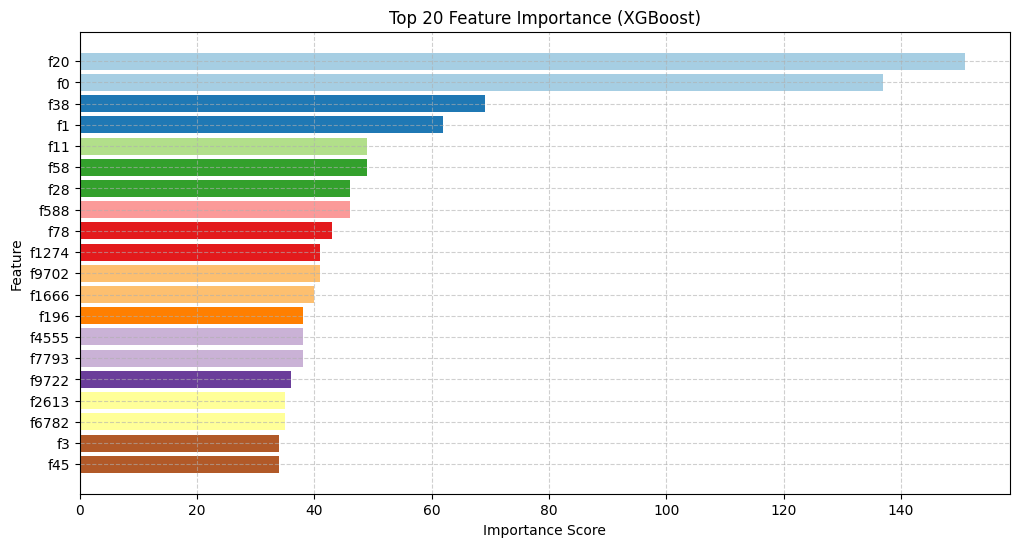

In [ ]:
# ✅ XGBoost 모델에서 Feature Importance 가져오기
feature_importance = model.get_score(importance_type="weight")

# ✅ Feature Importance를 정렬하여 그래프 그리기
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
feature_names, feature_scores = zip(*sorted_features)

plt.figure(figsize=(12, 6))
plt.barh(feature_names[:20], feature_scores[:20], color=plt.cm.Paired(np.linspace(0, 1, len(feature_scores[:20]))))
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 20 Feature Importance (XGBoost)")
plt.gca().invert_yaxis()  # 중요도가 높은 순서로 정렬
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

### 2. SHAP + 시각화

In [ ]:
import shap

100%|===================| 38765/38787 [20:56<00:00]       

<Figure size 1200x600 with 0 Axes>

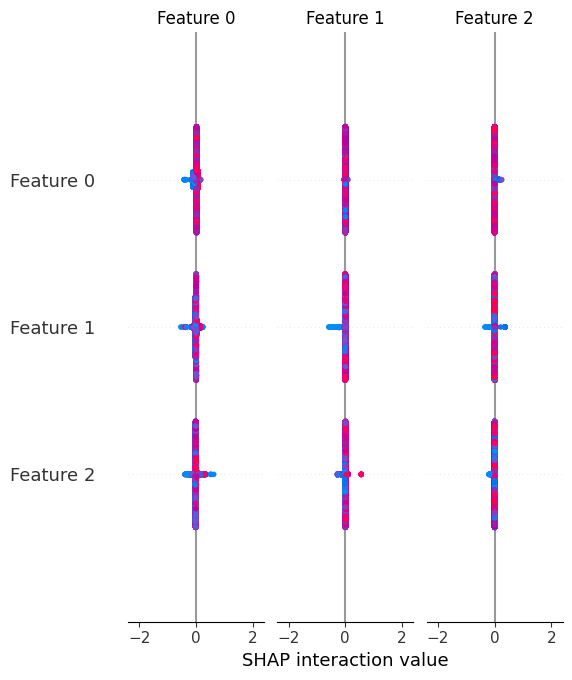

In [ ]:
# ✅ SHAP 분석을 위한 객체 생성
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# ✅ SHAP Summary Plot (전체 Feature 영향력 분석)
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values, X_test, plot_type="dot", show=True)
